**🔍 1. What is Feature Engineering?**
    
Feature engineering is the process of transforming raw data into meaningful features that help your model perform better.

In simple words:
    
You're improving the "ingredients" (features) that your model uses to learn and make decisions.

🧩 2. Types of Feature Engineering

Feature Creation = Combine petal_length and width to make petal_area

Encoding Categorical = Convert species (Setosa, etc.) into numbers

Feature Scaling	= Normalize/Standardize features for models

Binning	Group = continuous data into categories

Interaction Features = Multiply/combine features together


In [2]:
import seaborn as sns
import pandas as pd

In [3]:
#Load Dataset
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Create New Features**

We’ll create two new features:

Petal Area = petal_length × petal_width

Sepal Area = sepal_length × sepal_width

These are not in the original dataset but could be helpful for machine learning models to better separate the species.

In [5]:
iris["petal_area"] = iris["petal_length"]*iris["petal_width"]
iris["sepal_area"] = iris["sepal_length"]*iris["sepal_width"]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,setosa,0.28,18.00


📌 Why we do this:

Instead of treating length and width separately, we combine them to capture the overall size of petals and sepals — which can be more informative for classification.

---

**Encoding Categorical Feature**

🎯 Goal:

Convert the species column (which is a text label) into numerical values so that ML models can understand it.

We'll use Label Encoding — assigning a unique number to each species.

In [8]:
from sklearn.preprocessing import LabelEncoder

# Create encoder object
le = LabelEncoder()

# Fit and transform species column
iris["species_encoded"] = le.fit_transform(iris["species"])

# Check results
iris[["species", "species_encoded"]].head()

,species,species_encoded
0,setosa,0
1,setosa,0
2,setosa,0
3,setosa,0
4,setosa,0


📌 Why we do this:

ML models need numeric input. Text labels like 'setosa', 'versicolor', and 'virginica' must be converted to 0, 1, and 2 respectively.

---

**Feature Scaling (Normalization)**

🎯 Goal:

Scale all numeric features so that they’re on a similar range (usually 0 to 1 or -1 to 1). This is important for many ML models like KNN, SVM, and Neural Networks.

We'll use Min-Max Scaling here.

In [10]:
from sklearn.preprocessing import MinMaxScaler

#create a scaler
scaler = MinMaxScaler()

#select only numeric columns
numeric_cols = iris.drop(columns=["species", "species_encoded"])#we remove the categorical columns and keep only the numeric ones.

#scale the numeric columns
iris_scaled = scaler.fit_transform(numeric_cols)#All values in each column are scaled between 0 and 1.

#convert back to a Dataframe
iris_scaled_df = pd.DataFrame(iris_scaled, columns=numeric_cols.columns)
#fit_transform() gives back a NumPy array.
#This line converts the array back into a DataFrame so you can work with column names again.

#show result
iris_scaled_df.head()

,sepal_length,sepal_width,petal_length,petal_width,petal_area,sepal_area
0,0.222222,0.625000,0.067797,0.041667,0.010787,0.392108
1,0.166667,0.416667,0.067797,0.041667,0.010787,0.234765
2,0.111111,0.500000,0.050847,0.041667,0.009518,0.251748
3,0.083333,0.458333,0.084746,0.041667,0.012056,0.212787
4,0.194444,0.666667,0.067797,0.041667,0.010787,0.399600


📌Why we do this:

Prevents one large-range feature from dominating others.

Makes training faster and more accurate for most algorithms.

---

**Binning**

What is Binning?

Binning (or discretization) means converting a continuous numerical variable into categories or intervals.

Example:
Let’s say we have a continuous feature like sepal_length from the Iris dataset.

We can convert it into bins:

Short if sepal length is small

Medium if it's moderate

Long if it's large

This helps when:

You want to make plots more readable.

You want to use simpler models or rules.

You’re creating features for models that work better with categories.

In [11]:
#Create bins for sepal_length
bins = [0, 5.5, 6.5, iris["sepal_length"].max()]#We divide the data into 3 parts: 0–5.5, 5.5–6.5, and 6.5–max
labels = ["short", "Mediam", "Long"]#We name the bins: Short, Medium, Long

#Use pd.cut() to create a new binned feature
iris["sepal_length_binned"] = pd.cut(iris["sepal_length"], bins=bins, labels=labels)#pd.cut() This function creates a new column assigning each row to a bin

#See the result
iris[["sepal_length", "sepal_length_binned"]].head()

,sepal_length,sepal_length_binned
0,5.1,short
1,4.9,short
2,4.7,short
3,4.6,short
4,5.0,short


**Visualizing Binned Feature**
    
We’ll use a count plot to show how many flowers fall into each bin: Short, Medium, or Long.

C:\Users\lucky\AppData\Local\Temp\ipykernel_8708\2322775282.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(iris, x="sepal_length_binned", palette="Set2")#Shows how many samples(count of samples) are in each sepal length category


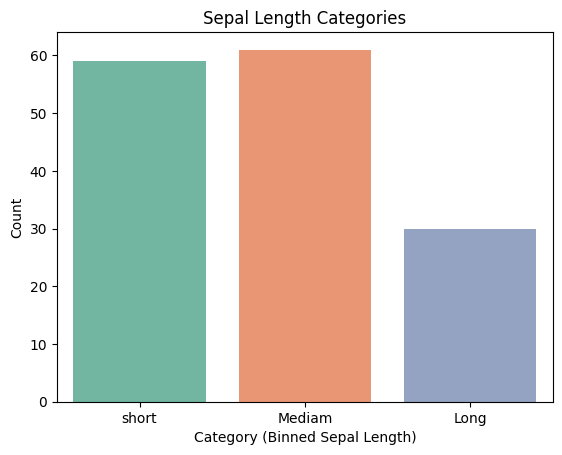

In [16]:
import matplotlib.pyplot as plt

sns.countplot(iris, x="sepal_length_binned", palette="Set2")#Shows how many samples(count of samples) are in each sepal length category

plt.title("Sepal Length Categories")
plt.xlabel("Category (Binned Sepal Length)")
plt.ylabel("Count")
plt.show()

We can see that mediam and short both are common with nearly 60 counts and long flowers are rare comparitively.